In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('cab_pricing_dataset_25000.csv')

In [3]:
df.shape

(25000, 14)

In [4]:
df.head()

,Distance (km),Fuel Type,Duration (min),Base Fare (₹),Traffic Conditions,Weather,Time of Day,Day,Demand/Supply Ratio,Surge Multiplier,Traffic/Delay (min),Driver Availability,Fuel Price (₹/km),Final Price (₹)
0,39,Diesel,45,50,Heavy,Stormy,Off-peak,Tue,1.261445,1.013038,8,High,3.2,338.385648
1,29,Petrol,51,50,Heavy,Clear,Off-peak,Fri,2.196195,1.216952,11,High,4.5,755.027129
2,15,Petrol,18,50,Heavy,Snowy,Peak,Tue,2.888761,1.553546,13,Low,4.5,688.880932
3,43,CNG,23,50,Heavy,Stormy,Peak,Thu,1.430732,1.734012,11,Medium,2.8,536.868210
4,8,Diesel,32,50,Light,Stormy,Peak,Fri,1.258625,1.815717,14,Low,3.2,319.028858


In [5]:
df.isnull().sum()

Distance (km)          0
Fuel Type              0
Duration (min)         0
Base Fare (₹)          0
Traffic Conditions     0
Weather                0
Time of Day            0
Day                    0
Demand/Supply Ratio    0
Surge Multiplier       0
Traffic/Delay (min)    0
Driver Availability    0
Fuel Price (₹/km)      0
Final Price (₹)        0
dtype: int64

In [7]:


# Define a custom label encoding mapping
label_encoding_mapping_Peak = {
    "Peak": 2,  # Give more weightage to 5.0
    "Off-peak": 0,
    "unknown":1
}

# Perform label encoding using the custom mapping
df['Time of Day'] = df['Time of Day'].map(label_encoding_mapping_Peak)

label_encoding_mapping_weekend = {
    "Mon": 1,  # Give more weightage to 5.0
    "Tue": 1,
    "Wed": 1,
    "Thu": 1,
    "Fri": 2,
    "Sat": 2,
    "Sun": 3,
}

df['Day'] = df['Day'].map(label_encoding_mapping_weekend)


label_encoding_mapping_Weather = {
    "Clear": 1,  # Give more weightage to 5.0
    "Snowy":3,
    "Rainy":4,
    "Stormy":5 
}

df['Weather'] = df['Weather'].map(label_encoding_mapping_Weather)

df.head()

,Distance (km),Fuel Type,Duration (min),Base Fare (₹),Traffic Conditions,Weather,Time of Day,Day,Demand/Supply Ratio,Surge Multiplier,Traffic/Delay (min),Driver Availability,Fuel Price (₹/km),Final Price (₹)
0,39,Diesel,45,50,Heavy,5,0,1,1.261445,1.013038,8,High,3.2,338.385648
1,29,Petrol,51,50,Heavy,1,0,2,2.196195,1.216952,11,High,4.5,755.027129
2,15,Petrol,18,50,Heavy,3,2,1,2.888761,1.553546,13,Low,4.5,688.880932
3,43,CNG,23,50,Heavy,5,2,1,1.430732,1.734012,11,Medium,2.8,536.868210
4,8,Diesel,32,50,Light,5,2,2,1.258625,1.815717,14,Low,3.2,319.028858


In [8]:
df['Traffic Conditions'] = pd.to_numeric(df['Traffic Conditions'], errors='coerce', downcast='integer')

In [9]:
# Define a custom label encoding mapping for Fuel Type
label_encoding_mapping_fuel = {
    "Petrol": 4, 
    "Diesel": 4,
    "CNG": 3,
    "LPG": 3,
    "EV": 1
}

# Perform label encoding using the custom mapping for Fuel Type
df['Fuel Type'] = df['Fuel Type'].map(label_encoding_mapping_fuel)

# Define a custom label encoding mapping for Driver Availability
label_encoding_mapping_driver_avail = {
    "Low": 1,
    "Medium": 2,
    "High": 3
}

# Perform label encoding using the custom mapping for Driver Availability
df['Driver Availability'] = df['Driver Availability'].map(label_encoding_mapping_driver_avail)

# Display the updated DataFrame
df.head()


,Distance (km),Fuel Type,Duration (min),Base Fare (₹),Traffic Conditions,Weather,Time of Day,Day,Demand/Supply Ratio,Surge Multiplier,Traffic/Delay (min),Driver Availability,Fuel Price (₹/km),Final Price (₹)
0,39,4,45,50,NaN,5,0,1,1.261445,1.013038,8,3,3.2,338.385648
1,29,4,51,50,NaN,1,0,2,2.196195,1.216952,11,3,4.5,755.027129
2,15,4,18,50,NaN,3,2,1,2.888761,1.553546,13,1,4.5,688.880932
3,43,3,23,50,NaN,5,2,1,1.430732,1.734012,11,2,2.8,536.868210
4,8,4,32,50,NaN,5,2,2,1.258625,1.815717,14,1,3.2,319.028858


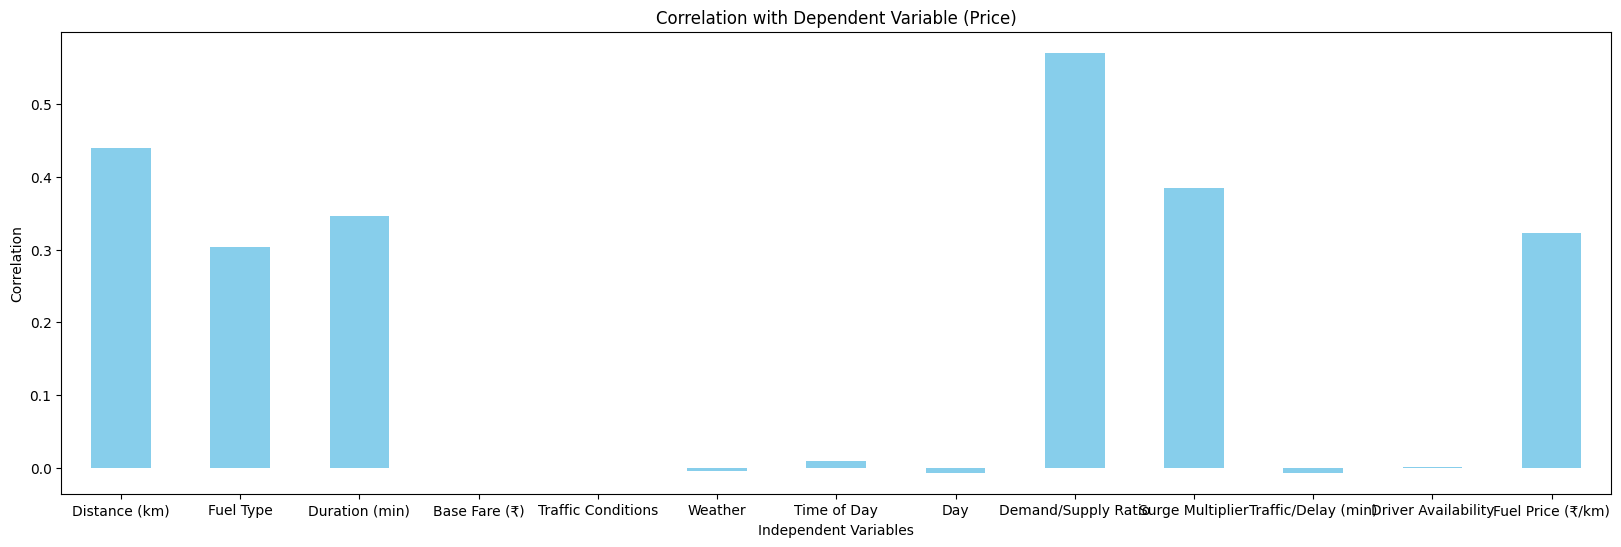

In [11]:
import matplotlib.pyplot as plt

# Drop non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation for the numeric columns
correlation = numeric_df.corr()['Final Price (₹)'].drop('Final Price (₹)')

# Create a bar graph to visualize the correlations
plt.figure(figsize=(20, 6))
correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation with Dependent Variable (Price)')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=0)
plt.show()


In [12]:
df.isnull().sum()

Distance (km)              0
Fuel Type                  0
Duration (min)             0
Base Fare (₹)              0
Traffic Conditions     25000
Weather                    0
Time of Day                0
Day                        0
Demand/Supply Ratio        0
Surge Multiplier           0
Traffic/Delay (min)        0
Driver Availability        0
Fuel Price (₹/km)          0
Final Price (₹)            0
dtype: int64

In [13]:
df.drop('Traffic Conditions', axis=1)

,Distance (km),Fuel Type,Duration (min),Base Fare (₹),Weather,Time of Day,Day,Demand/Supply Ratio,Surge Multiplier,Traffic/Delay (min),Driver Availability,Fuel Price (₹/km),Final Price (₹)
0,39,4,45,50,5,0,1,1.261445,1.013038,8,3,3.2,338.385648
1,29,4,51,50,1,0,2,2.196195,1.216952,11,3,4.5,755.027129
2,15,4,18,50,3,2,1,2.888761,1.553546,13,1,4.5,688.880932
3,43,3,23,50,5,2,1,1.430732,1.734012,11,2,2.8,536.868210
4,8,4,32,50,5,2,2,1.258625,1.815717,14,1,3.2,319.028858
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,3,57,50,1,0,1,2.497062,1.805784,7,1,2.8,752.127176
24996,32,4,29,50,3,2,1,1.356161,1.071774,3,2,3.2,305.816047
24997,25,3,46,50,1,2,3,2.962041,1.673654,3,1,2.8,1050.975294
24998,41,1,27,50,3,2,3,2.977662,1.435339,13,2,1.0,619.723160


In [14]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop('Final Price (₹)', axis=1)  # Assuming 'Price' is the target variable
y = df['Final Price (₹)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R2 Score: {rf_r2}")


Random Forest Evaluation Metrics:
Mean Squared Error (MSE): 941.7659189864642
Mean Absolute Error (MAE): 21.957802795572928
R2 Score: 0.988820391857893


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your data is in X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the imputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed

# Fit the imputer on the training data and transform it
X_train = imputer.fit_transform(X_train)

# Transform the test data using the same imputer
X_test = imputer.transform(X_test)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5 , random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Gradient Boosting Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"Mean Absolute Error (MAE): {gb_mae}")
print(f"R2 Score: {gb_r2}") 


C:\Users\NIKUNJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Traffic Conditions']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\NIKUNJ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Traffic Conditions']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Gradient Boosting Evaluation Metrics:
Mean Squared Error (MSE): 245.7196332955528
Mean Absolute Error (MAE): 11.932927982212291
R2 Score: 0.9970830870413925


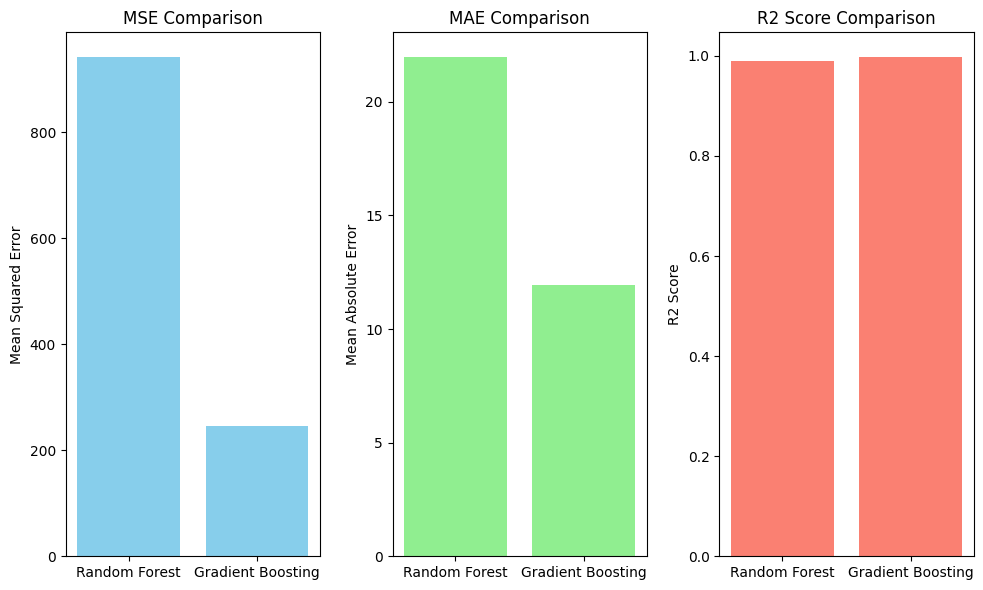

In [23]:
import matplotlib.pyplot as plt

# Store the evaluation metrics for comparison
models = ['Random Forest', 'Gradient Boosting']
mse_values = [rf_mse, gb_mse]
mae_values = [rf_mae, gb_mae]
r2_values = [rf_r2, gb_r2]

# Plot the comparison
plt.figure(figsize=(10, 6))

# Mean Squared Error
plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color='skyblue')
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')

# Mean Absolute Error
plt.subplot(1, 3, 2)
plt.bar(models, mae_values, color='lightgreen')
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error')

# R2 Score
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color='salmon')
plt.title('R2 Score Comparison')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
print(f"Best Random Forest Parameters: {grid_rf.best_params_}")

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_gb.fit(X_train, y_train)

# Best hyperparameters for Gradient Boosting
print(f"Best Gradient Boosting Parameters: {grid_gb.best_params_}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [20]:
import joblib

# Save the Random Forest model
joblib.dump(random_forest_model, 'random_forest_model_25000.pkl')

# Save the Gradient Boosting model
joblib.dump(gb_model, 'gradient_boosting_model_25000.pkl')


NameError: name 'random_forest_model' is not defined